The tipping problem
===

* 30 min | Última modificación: Junio 11, 2021 | [YouTube]

In [1]:
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
!pip install --quiet --upgrade fuzzy_toolbox

In [3]:
import numpy as np
from fuzzy_toolbox.mamdani import FuzzyRule, FuzzyVariable, Mamdani, trimf, zmf, smf, trapmf

## Variables difusas

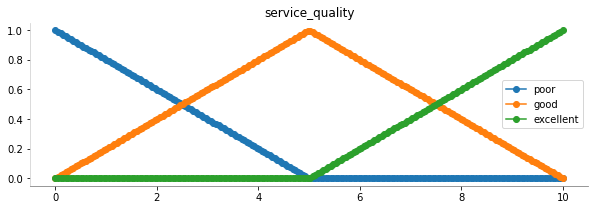

In [4]:
service_quality = FuzzyVariable(
    name="service_quality",
    universe=np.linspace(start=0, stop=10, num=200),
)

#
# Se especifican funciones de pertenencia triangulares para
# los conjuntos borrosos
#
service_quality["poor"] = trimf(
    service_quality.universe,
    -1, 
    0,
    5,
)
service_quality["good"] = trimf(
    service_quality.universe,
    0,
    5,
    10,
)
service_quality["excellent"] = trimf(
    service_quality.universe,
    5,
    10,
    10,
)

service_quality.plot()

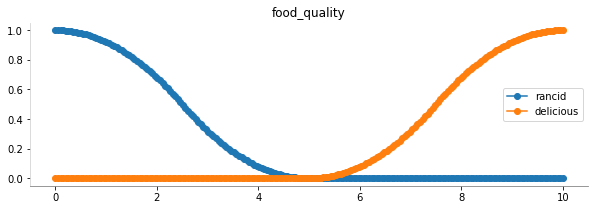

In [5]:
food_quality = FuzzyVariable(
    name="food_quality",
    universe=np.linspace(start=0, stop=10, num=200),
)

#
# Función de pertenencia Z
#
food_quality['rancid'] = zmf(food_quality.universe, 0, 5)

#
# Función de pertenencia S
#
food_quality['delicious'] = smf(food_quality.universe, 5, 10)

food_quality.plot()

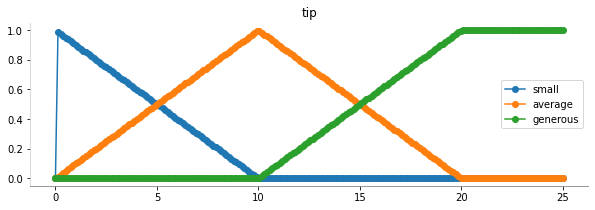

In [6]:
tip = FuzzyVariable(
    name="tip",
    universe=np.linspace(start=0, stop=25, num=200),
)

#
# Funciones de pertenencia triangulares
#
tip['small'] = trimf(tip.universe, 0, 0, 10)
tip['average'] = trimf(tip.universe, 0, 10, 20)

# Función de pertenencia trapezoidal
#
tip['generous'] = trapmf(tip.universe, 10, 20, 25, 25)

tip.plot()

## Reglas

In [7]:
#
# La regla usa el conector lógico OR
# 
rule_1 = FuzzyRule(
    antecedents=[
        (service_quality, "poor"),
        (food_quality, "rancid"),
    ],
    consequent=(tip, "small"),
    is_and=False,
)

rule_1

IF  service_quality IS poor
    OR food_quality IS rancid
THEN
    tip IS small

In [8]:
rule_2 = FuzzyRule(
    antecedents=[
        (service_quality, "good"),
    ],
    consequent=(tip, "average"),
)

rule_2

IF  service_quality IS good
THEN
    tip IS average

In [9]:
#
# La regla usa el conector lógico OR
# 
rule_3 = FuzzyRule(
    antecedents=[
        (service_quality, "excellent"),
        (food_quality, "delicious"),
    ],
    consequent=(tip, "generous"),
    is_and = False,
)

rule_3

IF  service_quality IS excellent
    OR food_quality IS delicious
THEN
    tip IS generous

## Sistema de inferencia

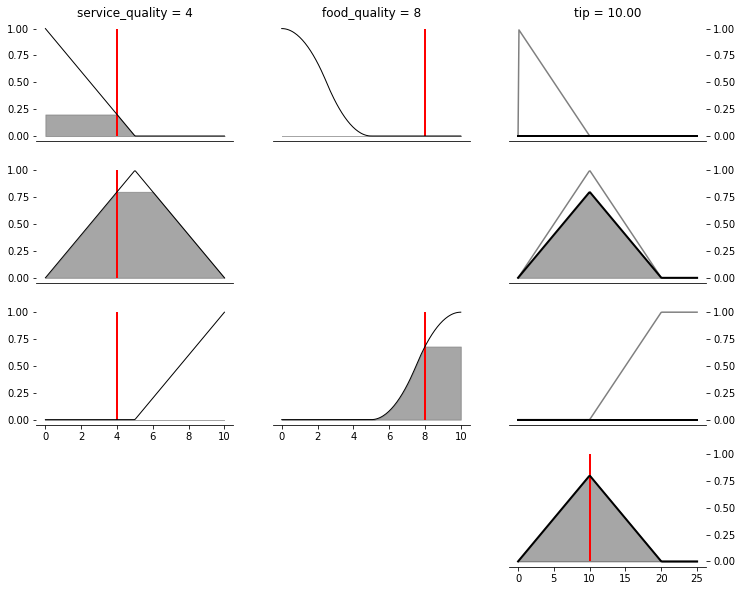

In [10]:
#
# Usa la regla composicional de inferencia max-prod
#
mamdani = Mamdani(
    rules=[
        rule_1,
        rule_2,
        rule_3,
    ],
    and_operator="prod",
    or_operator="max",
    implication_operator="prod",
    aggregation_operator="max",
    defuzzification_operator="cog",
)

plt.figure(figsize=(12, 10))

mamdani.plot(
    service_quality=4,
    food_quality=8,
)

## Modificadores lingüisticos

In [11]:
rule_1 = FuzzyRule(
    antecedents=[
        (service_quality, "very", "poor"),
        (food_quality, "extremely", "rancid"),
    ],
    consequent=(tip, "extremely", "small"),
    is_and=False,
)

rule_1

IF  service_quality IS very poor
    OR food_quality IS extremely rancid
THEN
    tip IS extremely small

In [12]:
rule_3 = FuzzyRule(
    antecedents=[
        (service_quality, "excellent"),
        (food_quality, "delicious"),
    ],
    consequent=(tip, "very", "generous"),
    is_and = False,
)

rule_3

IF  service_quality IS excellent
    OR food_quality IS delicious
THEN
    tip IS very generous

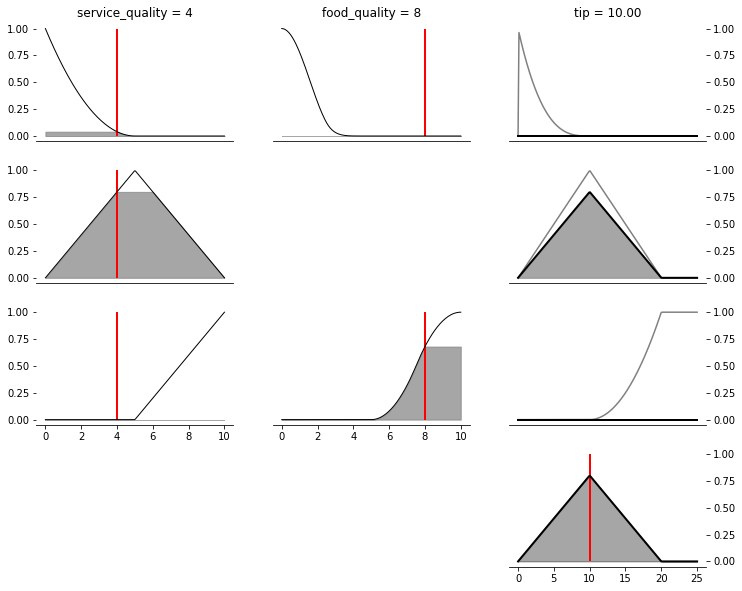

In [13]:
mamdani = Mamdani(
    rules=[
        rule_1,
        rule_2,
        rule_3,
    ],
    and_operator="prod",
    or_operator="max",
    implication_operator="prod",
    aggregation_operator="max",
    defuzzification_operator="cog",
)

plt.figure(figsize=(12, 10))

mamdani.plot(
    service_quality=4,
    food_quality=8,
)